## Week 9 Project | Deep Learning [Convolutional Neural Network] | Image Classifier

### 26 August 2022 

In [1]:
conda env list

# conda environments:
#
base                     /home/seun/anaconda3
deep_learning            /home/seun/anaconda3/envs/deep_learning
tensorflow            *  /home/seun/anaconda3/envs/tensorflow


Note: you may need to restart the kernel to use updated packages.


## Importing librairies

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from tensorflow.keras import models, layers

import cv2

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

import pandas as pd

from PIL import Image 

2022-08-27 13:53:16.690080: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-27 13:53:16.690131: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import os
from tensorflow.keras.preprocessing.image import load_img

## 0. Load dataset

In [4]:
path=('/home/seun/Desktop/spicedacademy/Week9/proj9/train/')

In [5]:

X = []
y = []
classes = ['Apples','Kiwis', 'Pears', 'Oranges']

for i, target in enumerate(classes):
      files = os.listdir(path+target)
      for file in files:
        
         # load the image
         img = Image.open(path + target + '/' + file) 

         # convert it to an array
         img_array = np.array(img)
        
         # one-hot enconded to indicate numerical differences
         if target == 'Apples':
            fruit = 0
         elif target == 'Kiwis':
            fruit = 1
         elif target == 'Pears':
            fruit = 2
         elif target == 'Oranges':
            fruit = 3
         else:
             print('wrong fruit')
         # append the array to X    
         X.append(img_array)
         y.append(fruit)
        
        

In [6]:
X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

### Check the data shapes

In [7]:
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((320, 224, 224, 3), (80, 224, 224, 3), (320,), (80,))

#### Now reshape to miror a set of: (images, w,h,channels)

In [8]:
xtrain.reshape(320,224,224,3).shape

(320, 224, 224, 3)

In [9]:
xtrain = xtrain.reshape(320,224,224,3)
xtest =xtest.reshape(80,224,224,3)

In [10]:
np.unique(ytrain)

array([0, 1, 2, 3])

#### Now we do the one hot encode the labels

In [11]:
ytest_true = ytest.copy()

In [12]:
to_categorical(ytest)

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],


In [13]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [14]:
ytrain.shape,ytest.shape

((320, 4), (80, 4))

In [15]:
ytrain

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

### 1. Define the model
- Convolutional layer with 6 filters 
    - Maxpooling
    - ReLu Activation
- Convolutional layer with 16 filters 
    - Maxpooling
    - ReLu Activation
- Flatten()
- Dense layer with 10 neurons
- Softmax activation for the classes

## CNN (Convolutional Neural Network)

In [16]:
from tensorflow.keras import backend as K
K.clear_session()
model = Sequential([
    Conv2D(filters=6,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2),strides=2),
    
    Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Flatten(),
    
    Dense(units=100,activation='relu'),
    
    # Dense unit=4 indicates 4 categories of images 
    Dense(units=4,activation='softmax')
])

2022-08-27 13:54:01.910832: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-08-27 13:54:01.910919: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seun-K56CB): /proc/driver/nvidia/version does not exist


*check summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 6)       168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 100)               5

### 2. Compile the model
- optimizer: 'rmsprop'
- loss
- metrics = accuracy

In [19]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

### 3. Fit the model
- epochs = 10 
- batch size = 128
- The typically mini-batch sizes are 64, 128, 256 or 512.

In [20]:
xtrain.shape

(320, 224, 224, 3)

In [21]:
accuracy_metrics = model.fit(xtrain,ytrain,batch_size=128,epochs=40,validation_split=0.2)

Epoch 1/40


2022-08-27 13:54:54.400622: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 77070336 exceeds 10% of free system memory.
2022-08-27 13:54:54.438285: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154140672 exceeds 10% of free system memory.
2022-08-27 13:54:55.093877: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 102760448 exceeds 10% of free system memory.
2022-08-27 13:54:55.533064: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 102760448 exceeds 10% of free system memory.
2022-08-27 13:54:56.354273: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 77070336 exceeds 10% of free system memory.


2/2 [==============================] - 7s 3s/step - loss: 3967.5474 - accuracy: 0.2070 - val_loss: 3230.3240 - val_accuracy: 0.3906
Epoch 2/40
2/2 [==============================] - 6s 3s/step - loss: 2824.0527 - accuracy: 0.3711 - val_loss: 1286.6301 - val_accuracy: 0.2656
Epoch 3/40
2/2 [==============================] - 6s 3s/step - loss: 1272.9203 - accuracy: 0.2500 - val_loss: 1262.3788 - val_accuracy: 0.2500
Epoch 4/40
2/2 [==============================] - 6s 3s/step - loss: 875.4797 - accuracy: 0.2461 - val_loss: 563.6780 - val_accuracy: 0.4531
Epoch 5/40
2/2 [==============================] - 6s 3s/step - loss: 579.5251 - accuracy: 0.3594 - val_loss: 94.8785 - val_accuracy: 0.6562
Epoch 6/40
2/2 [==============================] - 6s 3s/step - loss: 123.6852 - accuracy: 0.6016 - val_loss: 184.0542 - val_accuracy: 0.7500
Epoch 7/40
2/2 [==============================] - 6s 3s/step - loss: 95.8380 - accuracy: 0.8359 - val_loss: 0.8920 - val_accuracy: 0.9375
Epoch 8/40
2/2 [======

In [22]:
ytrain.shape

(320, 4)

*plot accuracy curve

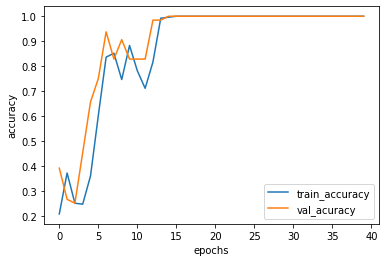

In [23]:
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

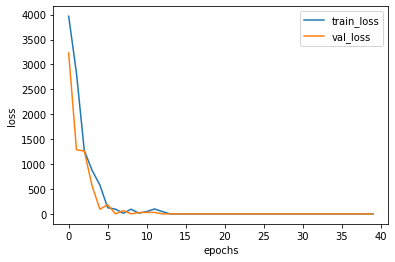

In [24]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['loss'],label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [25]:
xtest.shape

(80, 224, 224, 3)

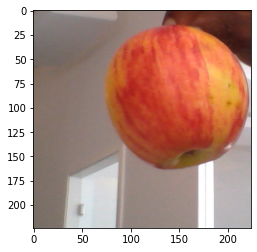

In [42]:
from matplotlib import pyplot as plt

plt.imshow(xtest[17])

In [31]:
ytest.shape

(80, 4)

In [41]:
ytest[17]

array([1., 0., 0., 0.], dtype=float32)

In [38]:
pred = model.predict(xtest)

3/3 [==============================] - 1s 175ms/step


In [40]:
pred[17]

array([0.99999994, 0.        , 0.        , 0.        ], dtype=float32)

In [43]:
pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-

<AxesSubplot:>

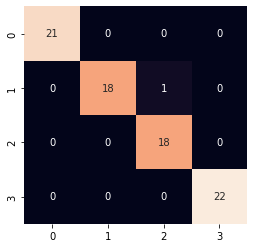

In [44]:
plt.figure(figsize = (4,4))
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true=ytest_true, y_pred=np.argmax(pred, axis=-1))
sns.heatmap(cm,annot=True,cbar=False)

### Save the model(base_model_cnn.h5)

In [45]:
model.save("base_model_cnn.h5")

In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

model = load_model("base_model_cnn.h5")

In [47]:
# for checking the model procedure/layers
model.layers

In [48]:
# redefine model to output right after the first hidden layer
K.clear_session()
model_small = Model(inputs=model.inputs, outputs=model.layers[3].output)
model_small.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 6)       168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
Total params: 1,048
Trainable params: 1,048
Non-trainable par

In [49]:
# we'll make a function to evaluate the accuracy of our model

def evaluate(model, x, y):
    scores = model.evaluate(x, y, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


In [50]:
print('Training dataset accuracy')
evaluate(model, xtrain, ytrain)
print()
print('Test dataset accuracy')
evaluate(model, xtest, ytest)


Training dataset accuracy
accuracy: 100.00%

Test dataset accuracy
accuracy: 98.75%


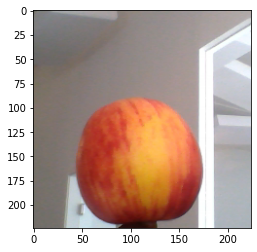

In [51]:
# load the image with the required shape
img = xtrain[1]
plt.imshow(img, cmap=plt.cm.Greys)

In [52]:
img.shape

(224, 224, 3)

In [53]:
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
#img = expand_dims(img, axis=3)
img.shape

(1, 224, 224, 3)

In [59]:
# get feature map for first hidden layer
feature_maps = model_small.predict(img)

1/1 [==============================] - 0s 45ms/step


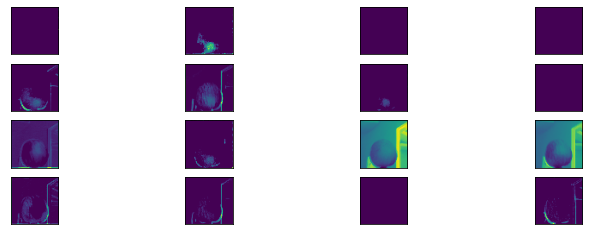

In [60]:
# plot all 32 maps in an 4*8 squares
height = 4
width = 4
ix = 1
plt.figure(figsize=(12,4))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
# show the figure
plt.show()